In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_carlsen = pd.read_csv('df_carlsen_limpio.csv')
df_carlsen['date_played'] = pd.to_datetime(df_carlsen['date_played'])
df_carlsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4257 entries, 0 to 4256
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4257 non-null   int64         
 1   event        4257 non-null   object        
 2   site         4257 non-null   object        
 3   date_played  4257 non-null   datetime64[ns]
 4   white        4257 non-null   object        
 5   black        4257 non-null   object        
 6   result       4257 non-null   object        
 7   white_elo    4257 non-null   float64       
 8   black_elo    4257 non-null   float64       
 9   winner       4257 non-null   object        
 10  loser        4257 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 366.0+ KB


In [4]:
df_carlsen.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser
0,16,Open NOR-ch,Oslo NOR,2001-04-13,"Carlsen,M","Johansen,SA",1-0,2064.0,2159.0,"Carlsen,M","Johansen,SA"
1,17,Open NOR-ch,Oslo NOR,2001-04-14,"Badea,B","Carlsen,M",1-0,2492.0,2064.0,"Badea,B","Carlsen,M"
2,18,Classics IMA,Gausdal NOR,2001-04-15,"Carlsen,M","Vegh,E",0-1,2064.0,2305.0,"Vegh,E","Carlsen,M"
3,19,Classics IMA,Gausdal NOR,2001-04-16,"Carlsen,M","Hole,O",0-1,2064.0,2245.0,"Hole,O","Carlsen,M"
4,20,Classics IMA,Gausdal NOR,2001-04-17,"Hersvik,D","Carlsen,M",1/2-1/2,2195.0,2064.0,draw,draw


In [5]:
def resultado(value):
    name = 'Carlsen,M'
    if value == name:
        return 'Win'
    elif value == 'draw':
        return 'Draw'
    else:
        return 'Lose'

In [20]:
df_carlsen['resultado'] = df_carlsen['winner'].transform(resultado)
df_carlsen['resultado'].value_counts()

resultado
Win     1937
Draw    1628
Lose     692
Name: count, dtype: int64

In [7]:
df_carlsen.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser,resultado
0,16,Open NOR-ch,Oslo NOR,2001-04-13,"Carlsen,M","Johansen,SA",1-0,2064.0,2159.0,"Carlsen,M","Johansen,SA",Win
1,17,Open NOR-ch,Oslo NOR,2001-04-14,"Badea,B","Carlsen,M",1-0,2492.0,2064.0,"Badea,B","Carlsen,M",Lose
2,18,Classics IMA,Gausdal NOR,2001-04-15,"Carlsen,M","Vegh,E",0-1,2064.0,2305.0,"Vegh,E","Carlsen,M",Lose
3,19,Classics IMA,Gausdal NOR,2001-04-16,"Carlsen,M","Hole,O",0-1,2064.0,2245.0,"Hole,O","Carlsen,M",Lose
4,20,Classics IMA,Gausdal NOR,2001-04-17,"Hersvik,D","Carlsen,M",1/2-1/2,2195.0,2064.0,draw,draw,Draw


visctorias vs derrotas


C:\Users\franc\AppData\Local\Temp\ipykernel_16816\2804881912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_carlsen['resultado'].value_counts().index, y= df_carlsen['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10')


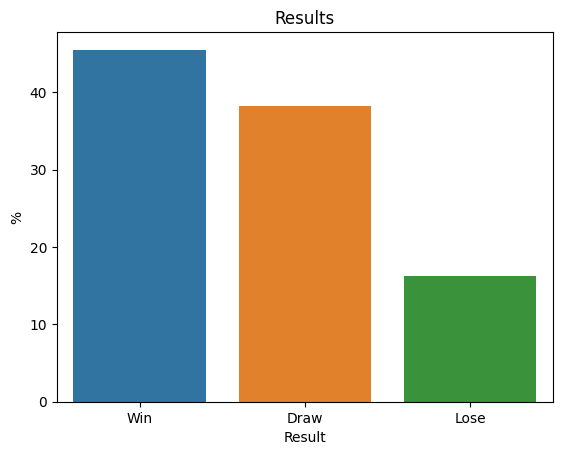

In [8]:
sns.barplot(x= df_carlsen['resultado'].value_counts().index, y= df_carlsen['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10')
plt.title('Results') 
plt.xlabel('Result')  
plt.ylabel('%')  
#plt.savefig('resultados_carlsen.png', transparent= True)

In [26]:
df_carlsen[df_carlsen['loser'] == 'Carlsen,M']['winner'].value_counts()

# aronian y tang son los jugadores que mas le han ganado

winner
Aronian,L            38
Tang,Andrew          38
Nakamura,Hi          36
Vachier Lagrave,M    27
Firouzja,Alireza     25
                     ..
Onischuk,Al           1
Graf,A                1
Bologan,V             1
Korchnoi,V            1
Niemann,Hans Moke     1
Name: count, Length: 197, dtype: int64

carlsen vs aronian

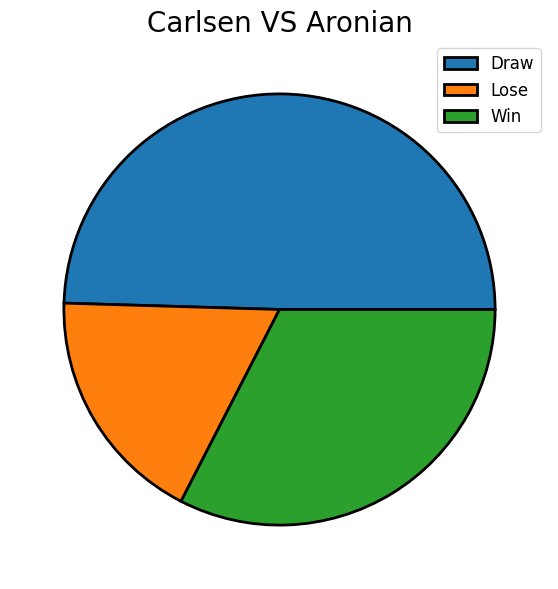

In [27]:
df_rival = df_carlsen[(df_carlsen['white'] == 'Aronian,L') | (df_carlsen['black'] == 'Aronian,L')]

res_carlsen_aronian = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_carlsen_aronian.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Carlsen VS Aronian', fontsize= 20)
plt.legend(res_carlsen_aronian.sort_index().index, loc= 'best', fontsize= 'large');
#plt.savefig('carlsen_vs_aronian_pie.png', transparent= True)

In [31]:
res_carlsen_aronian

resultado
Draw    105
Win      69
Lose     38
Name: count, dtype: int64

In [10]:
res_carlsen_aronian.sort_index()

resultado
Draw    105
Lose     38
Win      69
Name: count, dtype: int64

carlsen vs tang

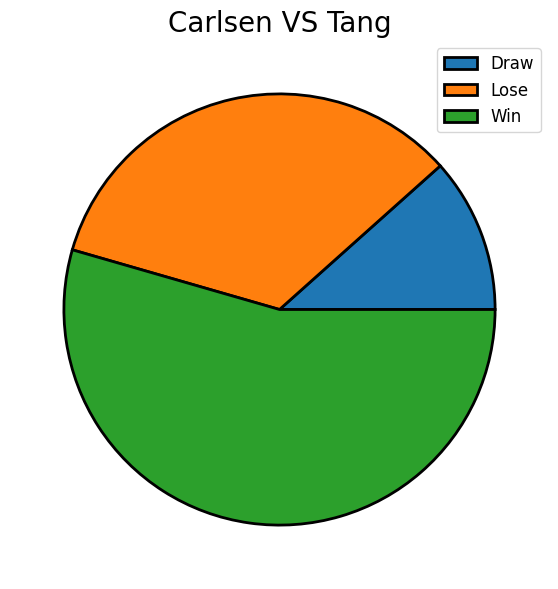

In [28]:
df_rival = df_carlsen[(df_carlsen['white'] == 'Tang,Andrew') | (df_carlsen['black'] == 'Tang,Andrew')]

res_carlsen_tang = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_carlsen_tang.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Carlsen VS Tang', fontsize= 20)
plt.legend(res_carlsen_tang.sort_index().index, loc= 'best', fontsize= 'large');
#plt.savefig('carlsen_vs_tang_pie.png', transparent= True)

# es interesante que contra aronian y nakamura tiene muchos mas empates y luego mas victorias que derrotas
# contra tang es o ganar o perder, los empates son mucho mas reducidos pero el porcentaje de derrotas contra tang es mucho mas elevado que contra los otros, sera por el estilo de juego de tang?

In [32]:
res_carlsen_tang

resultado
Win     61
Lose    38
Draw    13
Name: count, dtype: int64

In [12]:
res_carlsen_tang.sort_index()

resultado
Draw    13
Lose    38
Win     61
Name: count, dtype: int64

carlsen vs nakamura

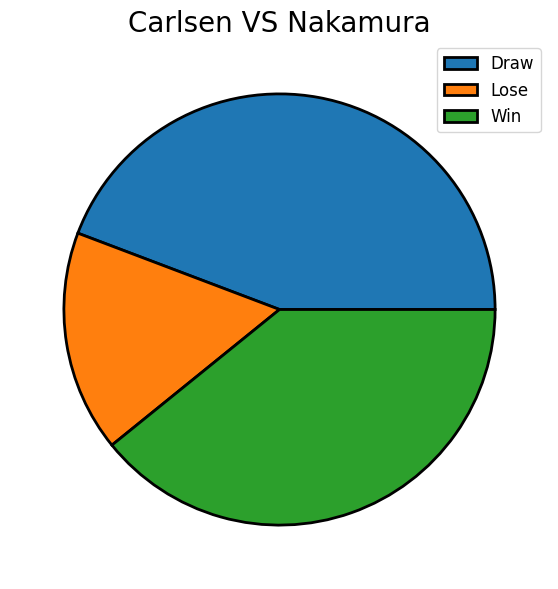

In [29]:
df_rival = df_carlsen[(df_carlsen['white'] == 'Nakamura,Hi') | (df_carlsen['black'] == 'Nakamura,Hi')]

res_carlsen_nakamura = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_carlsen_nakamura.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Carlsen VS Nakamura', fontsize= 20)
plt.legend(res_carlsen_nakamura.sort_index().index, loc= 'best', fontsize= 'large');
#plt.savefig('carlsen_vs_nakamura_pie.png', transparent= True)

In [14]:
res_carlsen_nakamura.sort_index()

resultado
Draw    96
Lose    36
Win     85
Name: count, dtype: int64

carlsen vs caruana

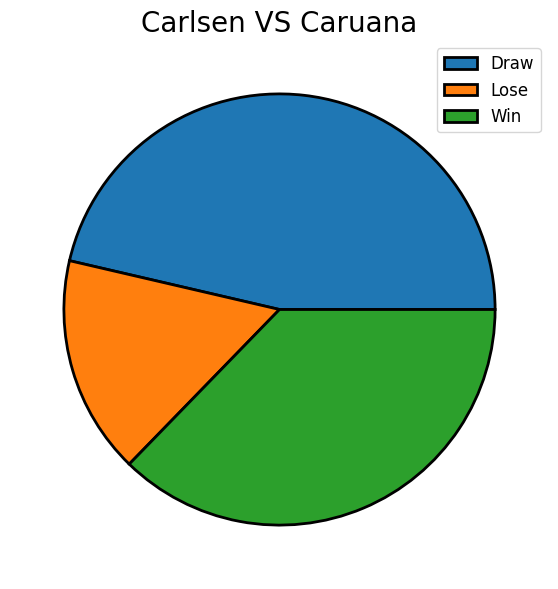

In [30]:
df_rival = df_carlsen[(df_carlsen['white'].str.contains('Caruana')) | (df_carlsen['black'].str.contains('Caruana'))]

res_carlsen_caruana = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_carlsen_caruana.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Carlsen VS Caruana', fontsize= 20)
plt.legend(res_carlsen_caruana.sort_index().index, loc= 'best', fontsize= 'large');
#plt.savefig('carlsen_vs_caruana_pie.png', transparent= True)

In [16]:
res_carlsen_caruana

resultado
Draw    51
Win     41
Lose    18
Name: count, dtype: int64